In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
print(plt.style.available)
plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv(r"D:/DAP/Personal Project/e-commerce_data/data.csv",encoding='ISO-8859-1')
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df=df.drop_duplicates()
pd.set_option("display.max.rows",1000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df = df.dropna(subset=['CustomerID'])

In [8]:
df=df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [9]:
df = df[df['Quantity'] > 0]

In [10]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [11]:
df= df[df['UnitPrice']>0]

In [12]:
df['Sales']= df['Quantity']*df['UnitPrice']

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Sales        392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [16]:
# EDA

In [17]:
df['Quantity'].max()

np.int64(80995)

In [18]:
print(df.shape)            # Rows and columns

print(df.dtypes)           # Data types


(392692, 9)
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Sales                 float64
dtype: object


In [19]:
print(df.describe())       # Stats for numeric columns
print(df.isnull().sum())   # Double-check for nulls

            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          CustomerID          Sales  
count  392692.000000  392692.000000  
mean    15287.843865      22.631500  
min     12346.000000       0.001000  
25%     13955.000000       4.950000  
50%     15150.000000      12.450000  
75%     16791.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.539549     311.099224  
InvoiceNo      0
StockCode 

In [20]:
#Date Range
print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [21]:
print(df[df['Quantity'] == df['Quantity'].max()])

       InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country     Sales  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  168469.6  


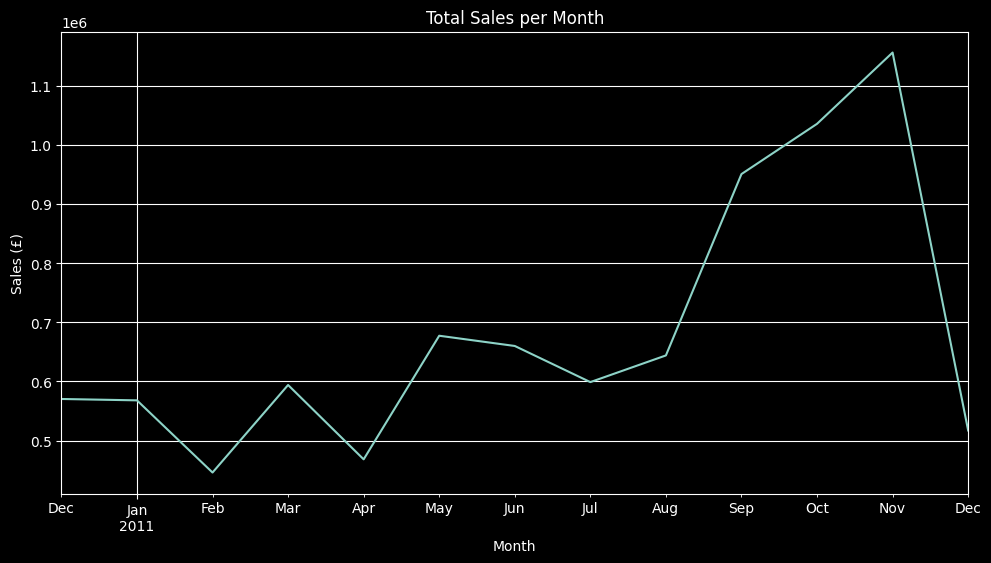

In [22]:
df.set_index('InvoiceDate').resample('ME')['Sales'].sum().plot(figsize=(11.7,6))
plt.title('Total Sales per Month')
plt.ylabel('Sales (£)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

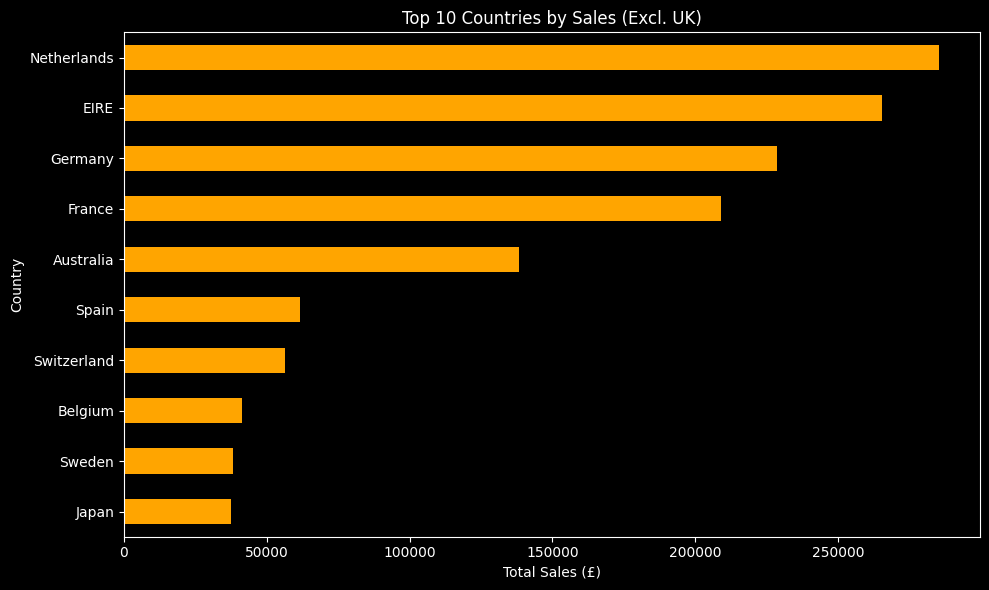

In [23]:
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)[1:11]  # Exclude top (UK)
top_countries.plot(kind='barh', figsize=(10,6), color='orange')
plt.title("Top 10 Countries by Sales (Excl. UK)")
plt.xlabel("Total Sales (£)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


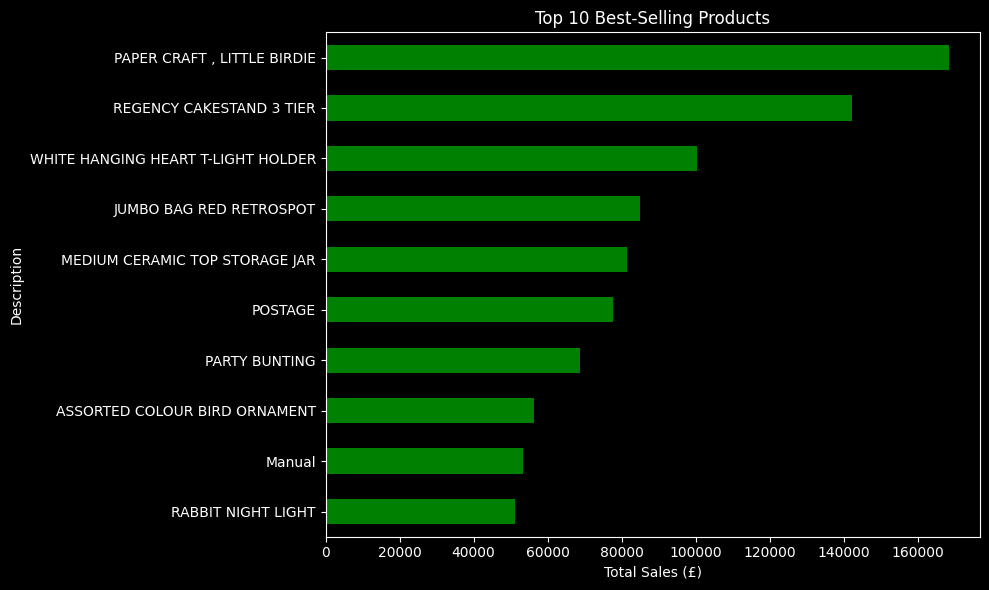

In [24]:
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), color='green')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales (£)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

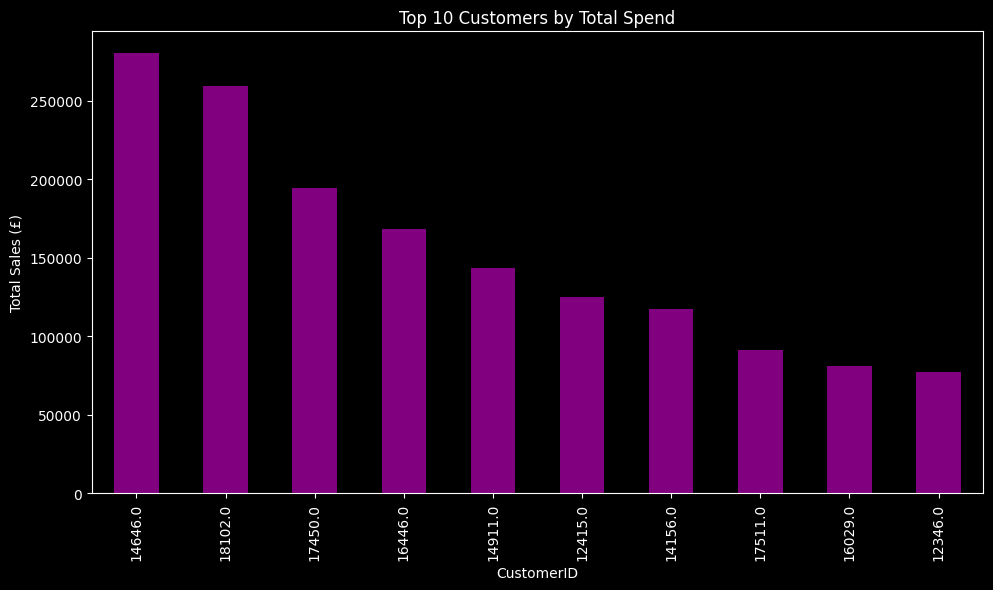

In [ ]:
top_customers = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(11.5,6), color='purple')
plt.title("Top 10 Customers by Total Spend")
plt.ylabel("Total Sales (£)")
plt.show()      

In [26]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Sales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.sort_values('Monetary', ascending=False)
print(rfm.head())


            Recency  Frequency   Monetary
CustomerID                               
14646.0           2         73  280206.02
18102.0           1         60  259657.30
17450.0           8         46  194390.79
16446.0           1          2  168472.50
14911.0           1        201  143711.17


In [27]:
# Recency: lower is better
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])


In [28]:
# Combine into one segment code (like 555, 123, etc.)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Optional: Sum of scores for easier sorting
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


In [ ]:
# RFM score customers
rfm.head(10)


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Cluster
CustomerID,,,,,,,,,
14646.0,2,73,280206.02,5,5,5,555,15,2
18102.0,1,60,259657.30,5,5,5,555,15,2
17450.0,8,46,194390.79,5,5,5,555,15,2
16446.0,1,2,168472.50,5,2,5,525,12,2
14911.0,1,201,143711.17,5,5,5,555,15,1
12415.0,24,21,124914.53,4,5,5,455,14,1
14156.0,10,55,117210.08,5,5,5,555,15,1
17511.0,3,31,91062.38,5,5,5,555,15,1
16029.0,39,63,80850.84,3,5,5,355,13,1


In [30]:
# K-Means Clustering

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]


In [33]:
scaler = StandardScaler() #scaling : cuz the values can be in hundreds and Thousands so we need to scale data first.
rfm_scaled = scaler.fit_transform(rfm_features)


In [34]:
inertia = []
K = range(1,11)

for k in K:
    model = KMeans(n_clusters=k, random_state =1)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

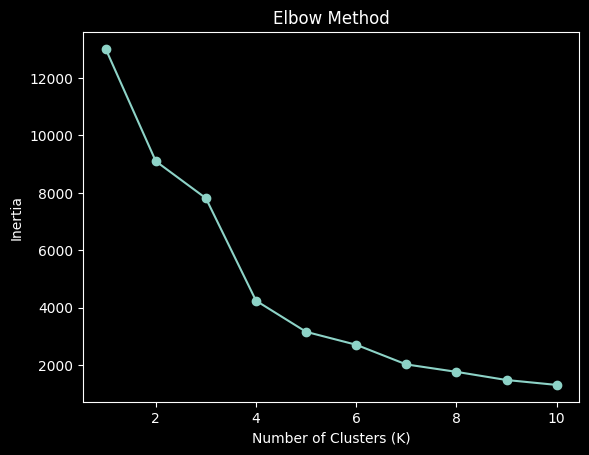

In [35]:
plt.plot(K, inertia, marker='o') #plotting
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [36]:
kmeans = KMeans(n_clusters= 4, random_state= 1 )
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [37]:
rfm.groupby('Cluster').mean(numeric_only=True).sort_values('Monetary', ascending=False)


,Recency,Frequency,Monetary,RFM_Score
Cluster,,,,
2,3.000000,45.250000,225681.652500,14.250000
1,6.583333,68.666667,56542.714167,14.833333
3,41.231677,4.651553,1845.024510,10.238820
0,246.318349,1.582569,629.796533,5.254128


In [38]:
# CLTV (customer lifetime value Analysis)
# CLTV = average order value x purchase frequency x gross margin

In [39]:
# AOV
aov = df.groupby('CustomerID')['Sales'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()

# Purchase frequency
total_order = df.groupby('CustomerID')['InvoiceNo'].nunique()
pf = total_order / len(df['CustomerID'].unique())

# Customer Value
cv= aov * pf

# gross margin (common for e-commerce is 0.40)
gross_margin = 0.40
cltv_simple = cv * gross_margin

cltv_simple = cltv_simple.reset_index().rename(columns= {0:'CLTV'})
print(cltv_simple.head())

   CustomerID      CLTV
0     12346.0  7.116976
1     12347.0  0.397418
2     12348.0  0.165721
3     12349.0  0.162061
4     12350.0  0.030834


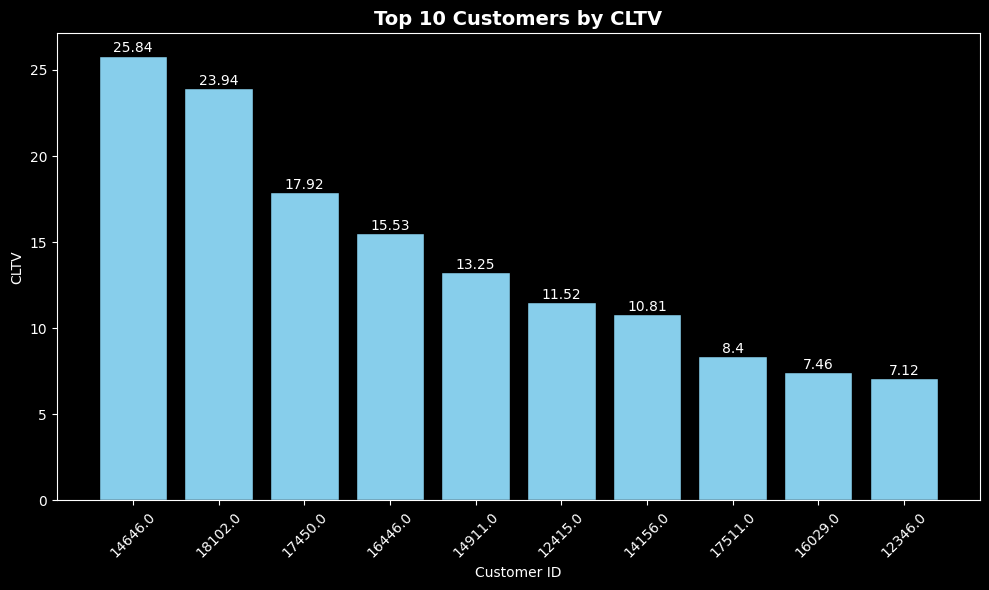

In [40]:
top10 = cltv_simple.sort_values('CLTV', ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(top10['CustomerID'].astype(str), top10['CLTV'], edgecolor='black', color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval,2), ha='center', va='bottom')

plt.title('Top 10 Customers by CLTV', fontsize=14, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('CLTV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
df.to_csv("cleaned_e-comm.csv", index=False)

In [42]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
# end of the code --- 